In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from sklearn.model_selection import train_test_split

# EDA

In [2]:
# Data set load
train = pd.read_csv('train.csv')

In [3]:
train.shape

(2048, 787)

In [4]:
train.head()

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2


In [5]:
train['digit'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 데이터 시각화

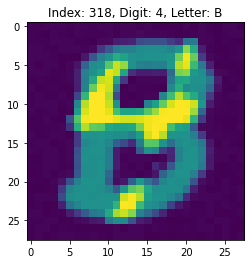

In [6]:
idx = 318
img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
digit = train.loc[idx, 'digit']
letter = train.loc[idx, 'letter']

plt.title('Index: %i, Digit: %s, Letter: %s'%(idx, digit, letter))
plt.imshow(img)
plt.show()

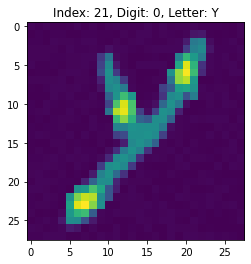

In [7]:
idx = 21
img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
digit = train.loc[idx, 'digit']
letter = train.loc[idx, 'letter']

plt.title('Index: %i, Digit: %s, Letter: %s'%(idx, digit, letter))
plt.imshow(img)
plt.show()

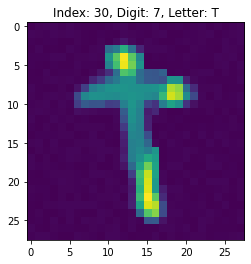

In [8]:
idx = 30
img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
digit = train.loc[idx, 'digit']
letter = train.loc[idx, 'letter']

plt.title('Index: %i, Digit: %s, Letter: %s'%(idx, digit, letter))
plt.imshow(img)
plt.show()

# Pre-processing

In [9]:
train.drop(['id'], axis=1, inplace=True)

In [10]:
X = np.array(train.iloc[:, 2:])
y = np.array(train['digit'].values)

X_train , X_test , y_train , y_test = train_test_split(X, y,
                                                       test_size=0.2)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1638, 784)
(410, 784)
(1638,)
(410,)


In [12]:
# 입력을 0, 1 사이로 정규화

y_train = np.asarray(y_train[:1638].astype('int32'))
y_test = np.asarray(y_test[:410].astype('int32'))
X_train = np.asarray(X_train[:1638].astype('float32') / 255.0)
X_test = np.asarray(X_test[:410].astype('float32') / 255.0)

In [13]:
# 이미지 형태로 reshape (Conv2D 쓰려면 3차원이어야 함)

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1638, 28, 28, 1)
(410, 28, 28, 1)
(1638,)
(410,)


## Data Augmentation

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255,
        zoom_range = 0.10,
        fill_mode='nearest')

## Model Building

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Layer
from tensorflow.keras import models

In [17]:
model = models.Sequential([
    Conv2D(filters = 32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    MaxPool2D(pool_size=(2,2), strides=1, padding='same'),
    Conv2D(filters = 64, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=2, padding='same'),
    Conv2D(filters = 128, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=1, padding='same'),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0

In [18]:
# 모델 컴파일
model.compile(tf.optimizers.Adam(lr = 0.001), 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

In [19]:
# 모델 훈련
history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=20,
                    validation_split=0.2)

Epoch 1/20
21/21 [==============================] - 2s 107ms/step - loss: 2.3078 - accuracy: 0.1206 - val_loss: 2.2985 - val_accuracy: 0.1159
Epoch 2/20
21/21 [==============================] - 2s 106ms/step - loss: 2.2889 - accuracy: 0.1137 - val_loss: 2.2810 - val_accuracy: 0.1311
Epoch 3/20
21/21 [==============================] - 2s 102ms/step - loss: 2.2670 - accuracy: 0.1405 - val_loss: 2.2150 - val_accuracy: 0.2470
Epoch 4/20
21/21 [==============================] - 2s 104ms/step - loss: 2.2058 - accuracy: 0.1786 - val_loss: 2.0789 - val_accuracy: 0.2652
Epoch 5/20
21/21 [==============================] - 2s 111ms/step - loss: 2.0888 - accuracy: 0.2382 - val_loss: 1.8947 - val_accuracy: 0.4177
Epoch 6/20
21/21 [==============================] - 2s 105ms/step - loss: 1.9459 - accuracy: 0.3313 - val_loss: 1.7483 - val_accuracy: 0.4329
Epoch 7/20
21/21 [==============================] - 2s 114ms/step - loss: 1.7818 - accuracy: 0.3824 - val_loss: 1.4708 - val_accuracy: 0.5366
Epoch 

In [20]:
# 모델 평가
performance_test = model.evaluate(X_test, y_test, verbose=2)
print('Test Loss and Accuracy ->', performance_test)

13/13 - 0s - loss: 0.6183 - accuracy: 0.8122
Test Loss and Accuracy -> [0.6183293461799622, 0.8121951222419739]


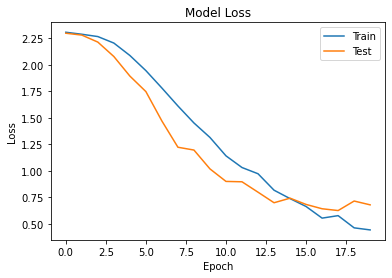

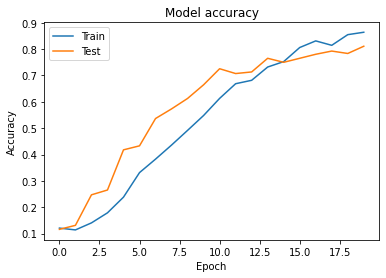

In [21]:
def plot_loss(history):
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

def plot_acc(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

plot_loss(history)
plt.show()
plot_acc(history)
plt.show()

In [22]:
# test, submission file load
test = pd.read_csv('test.csv')
sub = pd.read_csv('submission.csv')

In [23]:
# test data pre-processing
test = test.drop(['id', 'letter'], axis=1).values
test = test.reshape(-1, 28, 28, 1)
test = test/255

In [24]:
sub['digit'] = np.argmax(model.predict(test), axis=1)
sub.head()

,id,digit
0,2049,6
1,2050,9
2,2051,8
3,2052,0
4,2053,3


In [25]:
sub.to_csv('sub.csv', index=False)